# Ayudantía 4 IMT2230

## Ayudante: Pablo Rademacher

# P1

In [3]:
import numpy as np


# por componentes
def frob_norm(A):
    suma = 0
    for i in range(len(A)):
        for j in range(len(A[0])):
            suma += A[i,j]**2
    return np.sqrt(suma)


# por filas
def frob_norm2(A):
    suma = 0
    for i in range(len(A)):
        suma += np.linalg.norm(A[i])**2
    return np.sqrt(suma)


# por columnas
def frob_norm3(A):
    suma = 0
    for i in range(len(A[0])):
        suma += np.linalg.norm(A[:,i])**2
    return np.sqrt(suma)


A = np.array([[3, 4, 5], [12, 0, 8]])
print(frob_norm(A))
print(frob_norm2(A))
print(frob_norm3(A))
print(np.linalg.norm(A, ord="fro"))

16.06237840420901
16.06237840420901
16.06237840420901
16.06237840420901


# P2

In [4]:
import numpy.linalg as nl


def find_u_v_sigma(A):
    U, S, VH = nl.svd(A)
    return U[:, 0], S[0], VH[0]


def rank_one_approx(A):
    u1, s1, v1 = find_u_v_sigma(A)
    B = np.outer(A@v1, v1)  # Av1 v1^T
    return B

In [6]:
A = np.array([[4, 4, 5],
              [1, 2, 3],
              [3, 0, -1],
              [0, 7, -3]])


B = rank_one_approx(A)
print("La matriz de rango 1 que mejor aproxima a A es la siguiente:")
print(B)
print("\n")

print(f"El error de aproximación es {frob_norm(A-B)}.")
print("\n")

u1, s1, v1 = find_u_v_sigma(A)
print("Estas cantidades debiesen ser iguales:")
print(frob_norm(A-B)**2)
print(frob_norm(A)**2 - s1**2)
print("\n")


print("Estos vectores debiesen ser iguales")
print(u1)
print(1/s1*A@v1)

La matriz de rango 1 que mejor aproxima a A es la siguiente:
[[2.77347905 5.69146245 2.34240825]
 [1.28922581 2.64562313 1.08884658]
 [0.36382006 0.74659595 0.30727296]
 [1.99698471 4.09801672 1.68660134]]


El error de aproximación es 7.692248092035996.


Estas cantidades debiesen ser iguales:
59.17068070943142
59.17068070943141


Estos vectores debiesen ser iguales
[-0.75555644 -0.35121335 -0.09911255 -0.54402238]
[-0.75555644 -0.35121335 -0.09911255 -0.54402238]


In [7]:
A = np.array([[1, 2, 4, 10, -2],
              [-1, -2, 3, -4, 1]])


B = rank_one_approx(A)
print("La matriz de rango 1 que mejor aproxima a A es la siguiente:")
print(B)
print("\n")

print(f"El error de aproximación es {frob_norm(A-B)}.")
print("\n")

u1, s1, v1 = find_u_v_sigma(A)
print("Estas cantidades debiesen ser iguales:")
print(frob_norm(A-B)**2)
print(frob_norm(A)**2 - s1**2)
print("\n")


print("Estos vectores debiesen ser iguales")
print(u1)
print(1/s1*A@v1)

La matriz de rango 1 que mejor aproxima a A es la siguiente:
[[ 1.19965463  2.39930926  2.708187   10.20474784 -2.10067618]
 [-0.39761152 -0.79522304 -0.89759696 -3.38224451  0.69624459]]


El error de aproximación es 4.404504365313486.


Estas cantidades debiesen ser iguales:
19.39965870406556
19.39965870406556


Estos vectores debiesen ser iguales
[-0.94922155  0.3146084 ]
[-0.94922155  0.3146084 ]


In [8]:
A = np.array([[-2, 4, 0],
              [1, 2, 4],
              [3, 0, 6]])


B = rank_one_approx(A)
print("La matriz de rango 1 que mejor aproxima a A es la siguiente:")
print(B)
print("\n")

print(f"El error de aproximación es {frob_norm(A-B)}.")
print("\n")

u1, s1, v1 = find_u_v_sigma(A)
print("Estas cantidades debiesen ser iguales:")
print(frob_norm(A-B)**2)
print(frob_norm(A)**2 - s1**2)
print("\n")


print("Estos vectores debiesen ser iguales")
print(u1)
print(1/s1*A@v1)

La matriz de rango 1 que mejor aproxima a A es la siguiente:
[[-0.13359977 -0.03858877 -0.30578831]
 [ 1.6976709   0.49035281  3.88569461]
 [ 2.64670618  0.76447079  6.05788315]]


El error de aproximación es 4.835140445700768.


Estas cantidades debiesen ser iguales:
23.37858312965142
23.378583129651417


Estos vectores debiesen ser iguales
[-0.0424501   0.53941933  0.84096657]
[-0.0424501   0.53941933  0.84096657]


# P3

In [10]:
# a)

import pandas as pd


df = pd.read_csv("HDI.csv", encoding="latin-1", thousands=",")
df.head()

,HDI rank,Country,Human Development Index (HDI),Life expectancy at birth (decades),Expected years of schooling,Mean years of schooling,Gross national income (GNI) per capita (1k dollars)
0,42,Chile,0.855,7.89,16.7,10.9,24.563
1,47,Argentina,0.842,7.54,17.9,11.1,20.925
2,58,Uruguay,0.809,7.54,16.8,9.0,21.269
3,84,Peru,0.762,7.24,15.4,9.9,12.246
4,87,Brazil,0.754,7.28,15.6,8.1,14.370


In [11]:
datos = df[["Life expectancy at birth (decades)", "Expected years of schooling", "Mean years of schooling", "Gross national income (GNI) per capita (1k dollars)"]]

In [12]:
A = datos.to_numpy()


In [151]:
print(A)

[[ 7.89  16.7   10.9   24.563]
 [ 7.54  17.9   11.1   20.925]
 [ 7.54  16.8    9.    21.269]
 [ 7.24  15.4    9.9   12.246]
 [ 7.28  15.6    8.1   14.37 ]
 [ 7.28  14.4    8.9   14.384]
 [ 7.37  14.6    8.8   10.312]
 [ 7.03  13.     8.9   12.349]
 [ 6.36  14.9    9.8    8.111]
 [ 7.06  12.8   11.1    4.811]]


In [13]:
# b)

_, _, v1 = find_u_v_sigma(A)
print(v1)
proyecciones = [np.dot(dato, v1) for dato in A]
print(proyecciones)

[-0.29242956 -0.61851957 -0.38754094 -0.61784344]
[-32.03683064229155, -30.506497550152254, -29.224828183384435, -23.04515744752801, -23.795284302465266, -23.37174338163686, -20.967153391999844, -21.175397202307693, -19.88502294901992, -17.255752433842005]


In [14]:
import matplotlib.pyplot as plt


def graph_labeled_line(proyecciones):
    positions = range(len(proyecciones))
    
    # Create the real number line plot
    plt.figure(figsize=(10, 1)) 
    plt.plot(proyecciones, [0] * len(proyecciones), 'bo', markersize=10)  
    plt.xticks(proyecciones, positions)  # Label x-axis with positions
    plt.yticks([])
    plt.xlabel('Posicion Estimada')
    plt.title('Ranking Estimado de HDI')
    plt.grid(True)
    plt.show()

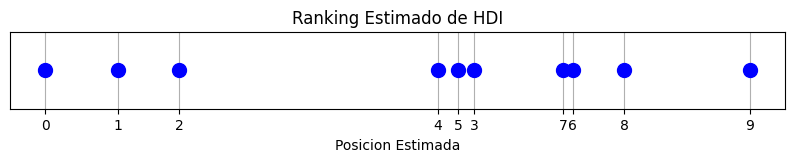

In [15]:
graph_labeled_line(proyecciones)

[-0.04937317 -0.21435334 -0.02230227 -0.97525255]
[-10.354277164005056, -7.05071223174073, -7.103575655346699, 1.9909627175231621, -0.08517520641659838, 0.14055344985924378, 4.066697819950904, 2.4376303694008037, 6.176487316209079, 9.781408584565895]


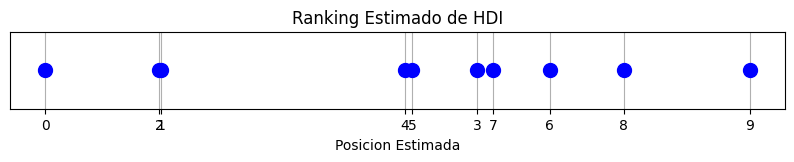

In [16]:
# c)

c = np.mean(A, axis=0)

C = np.array([row-c for row in A])

_, _, v1 = find_u_v_sigma(C)
print(v1)
proyecciones = [np.dot(dato, v1) for dato in C]
print(proyecciones)

graph_labeled_line(proyecciones)
